Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Test set processing

In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

Model Loading

In [14]:
cnn = tf.keras.models.load_model('plant_disease_model.keras')


Visualizing image in rgb format

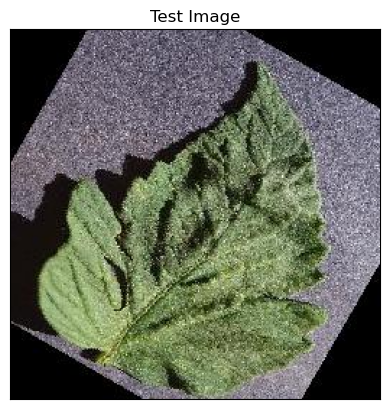

In [15]:
import cv2
image_path = 'test/test/TomatoHealthy3.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

Testing model

In [16]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


In [17]:
print(predictions)
np.sort(predictions)

[[1.91243757e-11 1.03550176e-14 4.52169075e-12 5.03361797e-14
  5.26389154e-13 6.90346946e-11 2.49033806e-15 1.21511188e-14
  5.76717927e-13 1.16417360e-16 1.36607771e-14 4.51337535e-16
  2.16482495e-14 3.22455543e-16 4.14184652e-17 1.60977262e-16
  2.35194633e-16 4.24690250e-15 6.67884420e-15 6.10683582e-14
  5.23957877e-10 8.65403967e-18 5.77366998e-14 6.26391300e-14
  1.03367445e-14 1.98522102e-11 7.40252564e-12 1.93321880e-13
  5.08559259e-15 2.06714749e-15 8.67264704e-10 1.49315664e-11
  7.26078789e-12 8.63930460e-16 7.29024174e-10 5.08273820e-16
  3.73568847e-15 1.00000000e+00]]


array([[8.65403967e-18, 4.14184652e-17, 1.16417360e-16, 1.60977262e-16,
        2.35194633e-16, 3.22455543e-16, 4.51337535e-16, 5.08273820e-16,
        8.63930460e-16, 2.06714749e-15, 2.49033806e-15, 3.73568847e-15,
        4.24690250e-15, 5.08559259e-15, 6.67884420e-15, 1.03367445e-14,
        1.03550176e-14, 1.21511188e-14, 1.36607771e-14, 2.16482495e-14,
        5.03361797e-14, 5.77366998e-14, 6.10683582e-14, 6.26391300e-14,
        1.93321880e-13, 5.26389154e-13, 5.76717927e-13, 4.52169075e-12,
        7.26078789e-12, 7.40252564e-12, 1.49315664e-11, 1.91243757e-11,
        1.98522102e-11, 6.90346946e-11, 5.23957877e-10, 7.29024174e-10,
        8.67264704e-10, 1.00000000e+00]], dtype=float32)

In [18]:
top_per_5 = np.sort(predictions).flatten()[::-1]
top_5 = np.argsort(predictions).flatten()[::-1]

disease=top_5[:5]
percentage=top_per_5[:5]*100
percentage

array([1.0000000e+02, 8.6726473e-08, 7.2902417e-08, 5.2395787e-08,
       6.9034694e-09], dtype=float32)

In [19]:
result_index = np.argmax(predictions)#Return index of max element
print(result_index)

37


In [20]:
#Prediction
model_prediction = class_name[result_index]


In [21]:
title_disease="Disease Name:",*(f"{class_name[disease[i]]}: {percentage[i]}%" for i in range(5))
title_disease

('Disease Name:',
 'Tomato___healthy: 100.0%',
 'Tomato___Late_blight: 8.672647311414039e-08%',
 'Tomato___Target_Spot: 7.290241654800411e-08%',
 'Potato___Early_blight: 5.2395787264458704e-08%',
 'Cherry_(including_sour)___Powdery_mildew: 6.903469351726699e-09%')

In [22]:


def segment_diseased_area(image_path):
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert to HSV color space for better color segmentation
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Define range for 'diseased' colors (e.g., brown, yellow)
    lower_bound = np.array([10, 50, 50])  # Adjust values based on the disease color
    upper_bound = np.array([35, 255, 255])

    # Create a mask for the diseased region
    mask = cv2.inRange(hsv, lower_bound, upper_bound)

    # Apply the mask to the original image
    result = cv2.bitwise_and(image, image, mask=mask)

    # Find contours of the masked area
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contour_image = image.copy()
    cv2.drawContours(contour_image, contours, -1, (255, 0, 0), 2)

    # Display results
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 3, 1)
    plt.title( "Leaf Given")
    plt.imshow(image)

    plt.subplot(1, 3, 2)
    plt.title("Masked Image")
    plt.imshow(mask, cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title("Diseased part")
    plt.imshow(contour_image)

    plt.show()


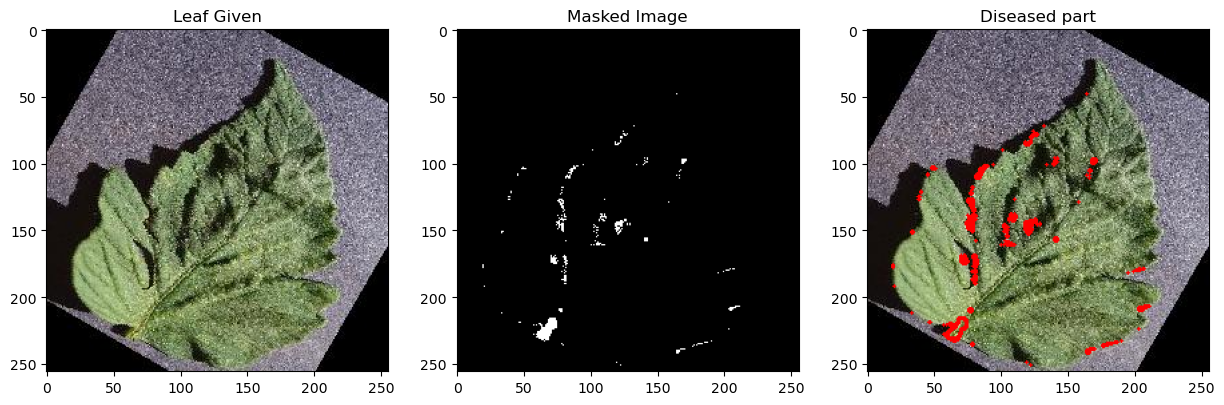

In [23]:

segment_diseased_area(image_path)

In [24]:
print("Diseases predicted are:")
for i in range(5):
    print(class_name[disease[i]],":",percentage[i],"%")

Diseases predicted are:
Tomato___healthy : 100.0 %
Tomato___Late_blight : 8.672647e-08 %
Tomato___Target_Spot : 7.290242e-08 %
Potato___Early_blight : 5.2395787e-08 %
Cherry_(including_sour)___Powdery_mildew : 6.9034694e-09 %
